# Classification using BERT

## Getting started

* Import dependencies
* Read BERT's embeddings which have been pickled

In [82]:
import pandas as pd
import numpy as np
import pickle as pkl
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

from src.utils.viz import *

plt.style.use('ggplot')

We will read BERT's output from previous notebook. These will serve as inputs for further models.

In [83]:
with open('./data/embeddings_train.pkl', 'rb') as f:
    train_embeddings = pkl.load(f)
    
with open('./data/embeddings_test.pkl', 'rb') as f:
    test_embeddings = pkl.load(f)

We read the labels.

In [84]:
df = pd.read_csv('./data/clean_entire_corpus.csv')

y_train = df[df['source'] == 'train']['target']
y_test = df[df['source'] == 'test']['target']

## Training models

We are going to test out several ML models and compare their performance's score. We will apply a grid search to find the best parameters.

### K-Nearest-Neighbors

In [93]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [11, 13, 15, 17]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, params, verbose=3)
clf.fit(train_embeddings, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_neighbors=11 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... n_neighbors=11, score=0.879, total=  13.4s
[CV] n_neighbors=11 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] ...................... n_neighbors=11, score=0.856, total=  13.5s
[CV] n_neighbors=11 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.9s remaining:    0.0s


[CV] ...................... n_neighbors=11, score=0.876, total=  13.4s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.857, total=  13.5s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.879, total=  13.6s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.885, total=  13.5s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.857, total=  14.5s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.880, total=  13.5s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.858, total=  13.8s
[CV] n_neighbors=13 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.7min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [11, 13, 15, 17]}, verbose=3)

In [94]:
neigh = KNeighborsClassifier(**clf.best_params_)
neigh.fit(train_embeddings, y_train)
print(clf.best_params_)
y_pred = neigh.predict(test_embeddings)

{'n_neighbors': 17}


Accuracy 0.8421697824088262
f1-score 0.8001552192471867


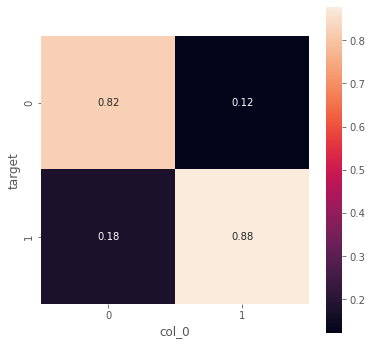

In [95]:
plot_confusion_matrix(y_test, y_pred)
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
print(f'f1-score {f1_score(y_pred, y_test)}')

### Support Vector Machine classifier

In [88]:
from sklearn.svm import SVC

clf = SVC(degree=2, kernel='poly')
clf.fit(train_embeddings, y_train)

SVC(degree=2, kernel='poly')

Accuracy 0.8378792522218818
f1-score 0.7931169339069221


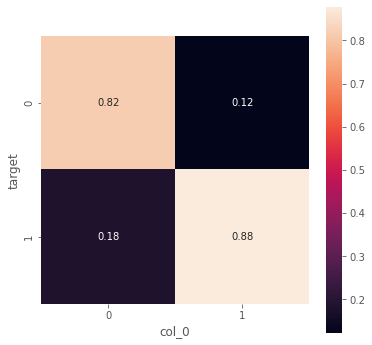

In [89]:
y_pred = clf.predict(test_embeddings)
plot_confusion_matrix(y_test, y_pred)
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
print(f'f1-score {f1_score(y_pred, y_test)}')

### Random Forest classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth':[6, 8, 10, 12, 14, 16]}
rdf = RandomForestClassifier()
grid = GridSearchCV(rdf, params, verbose=3)
grid.fit(train_embeddings, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=6, score=0.883, total=   7.8s
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] ......................... max_depth=6, score=0.858, total=   8.1s
[CV] max_depth=6 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s


[CV] ......................... max_depth=6, score=0.883, total=   7.8s
[CV] max_depth=6 .....................................................
[CV] ......................... max_depth=6, score=0.860, total=   7.7s
[CV] max_depth=6 .....................................................
[CV] ......................... max_depth=6, score=0.893, total=   7.7s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.887, total=   9.7s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.857, total=   9.6s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.884, total=   9.3s
[CV] max_depth=8 .....................................................
[CV] ......................... max_depth=8, score=0.869, total=   9.0s
[CV] max_depth=8 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.7min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16]}, verbose=3)

In [91]:
rdf = RandomForestClassifier(**grid.best_params_)
rdf.fit(train_embeddings, y_train)

RandomForestClassifier(max_depth=10)

Accuracy 0.8354275206864848
f1-score 0.7894943159545275


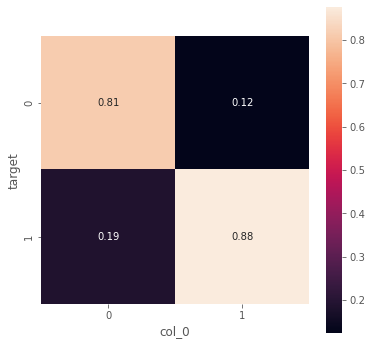

In [92]:
y_pred = rdf.predict(test_embeddings)
plot_confusion_matrix(y_test, y_pred)
print(f'Accuracy {accuracy_score(y_pred, y_test)}')
print(f'f1-score {f1_score(y_pred, y_test)}')

## Conclusion

Seems like the best model is KNN with a validation score of 0.84.